# ELL729 Coding Assignment 2

Solving an infinite horizon MDP using discounted cost and average cost formulation

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Discounted Cost Formulation

In [5]:
# The reward function ignores repeated visits to 100 from 100

def reward(next_state,state):
    if(state == 100 and next_state == 100):
        return 0
    else:
        if(next_state == 100):
            return 1
        else:
            return 0

In [211]:
# epsilon: Convergence criterion, alpha: discount factor, V: current iteration of optimal values, V_prev: previous iteration
# of optimal values, states: the states from 0 to 100, actions: stores the optimal actions for each state, p: probability of
# winning double your investment

def discounted_cost_problem(eps, alpha, V, V_prev, states, actions, p):
    iters = 1
    
    while(np.max(np.abs(V - V_prev)) > eps or iters < 1000):
        V_prev = np.copy(V)
        
        for state in range(101):
            
            V[state] = -100
            
            for action in range(min(state,100-state) + 1):
                
                next_reward = p*(reward(min(state+action,100),state) + alpha*V_prev[min(state+action,100)]) + (1-p)*(reward(max(0,state-action),state) + alpha*V_prev[max(0,state-action)])
                next_reward = round(next_reward,5)
                
                if(next_reward > V[state]):
                    V[state] = next_reward
                    actions[state] = action
        
        # V[100] = 1
        
        iters = iters + 1
        
    print(V)
    print(actions)
    print(iters)
    plt.plot(states,V,label='Values at p=' + str(p) )
    plt.legend()
    plt.savefig('Values_at_p=' + str(p) + ' discount_factor=' + str(alpha) + ' iters=' + str(iters) + 'GE' + '.png')
    plt.show()
    
    
    
    plt.plot(states,actions,label='Actions at p=' + str(p))
    plt.legend()
    plt.savefig('Actions_at_p=' + str(p) + ' discount_factor=' + str(alpha) + ' iters=' + str(iters) + 'GE' + '.png')
    plt.show()
    
    

## No discounting (discount factor = 1)

[0.      0.17938 0.32616 0.44629 0.54463 0.62516 0.6911  0.74515 0.78944
 0.82577 0.85557 0.88004 0.90015 0.91668 0.9303  0.94152 0.9508  0.95844
 0.9648  0.97004 0.97443 0.97805 0.9811  0.98364 0.9858  0.9876  0.98914
 0.99044 0.99156 0.99251 0.99334 0.99404 0.99467 0.9952  0.99569 0.9961
 0.99648 0.99681 0.99709 0.99736 0.99759 0.99782 0.99801 0.99819 0.99836
 0.99851 0.99864 0.99877 0.99888 0.99899 0.99908 0.99917 0.99926 0.99933
 0.9994  0.99946 0.99952 0.99956 0.9996  0.99964 0.99968 0.99972 0.99975
 0.99978 0.99981 0.99983 0.99985 0.99987 0.99989 0.99991 0.99992 0.99993
 0.99994 0.99995 0.99996 0.99997 0.99998 0.99999 1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      0.     ]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  2.  1.  2.  2.  1.  1.  2.  1. 

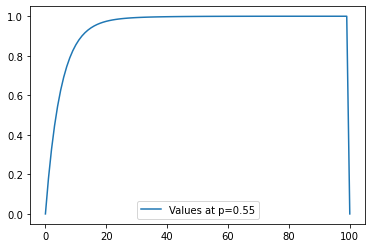

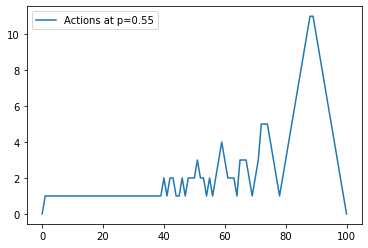

In [210]:
p_values = [0.4, 0.25, 0.55]

for i in range(1):
    discounted_cost_problem(1e-3,1,np.zeros(101),np.zeros(101),np.linspace(0,100,101),np.zeros(101),0.55)

## Discount factor = 0.9

[0.      0.00105 0.00291 0.00491 0.00809 0.01075 0.01364 0.01962 0.02247
 0.02532 0.02987 0.03424 0.0379  0.05241 0.05449 0.05765 0.06243 0.06551
 0.07033 0.08014 0.08297 0.08722 0.09512 0.09894 0.10527 0.144   0.14557
 0.14837 0.15137 0.15614 0.16013 0.16447 0.17343 0.17771 0.18198 0.1888
 0.19536 0.20085 0.22261 0.22574 0.23047 0.23765 0.24227 0.24949 0.26421
 0.26845 0.27483 0.28667 0.29241 0.3019  0.4     0.40157 0.40437 0.40737
 0.41213 0.41613 0.42047 0.42942 0.43371 0.43798 0.4448  0.45136 0.45685
 0.47861 0.48174 0.48647 0.49365 0.49827 0.50549 0.52021 0.52445 0.53083
 0.54267 0.54841 0.5579  0.616   0.61836 0.62255 0.62705 0.6342  0.64019
 0.6467  0.66014 0.66657 0.67296 0.6832  0.69304 0.70127 0.73391 0.73861
 0.7457  0.75648 0.7634  0.77424 0.79631 0.80268 0.81224 0.83001 0.83861
 0.85285 0.     ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25. 24. 23. 22. 29. 20. 19. 32. 17. 16. 15.
 14. 13. 12. 11. 10.  9.  8.  7.  

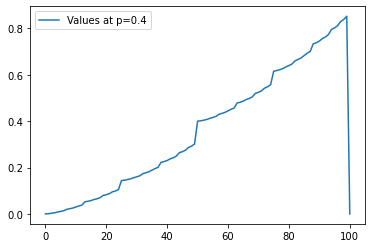

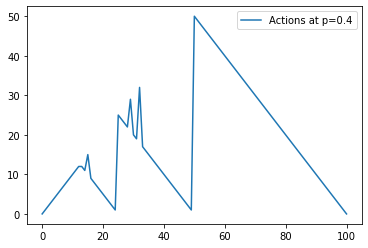

[0.0000e+00 4.0000e-05 1.7000e-04 3.6000e-04 7.4000e-04 1.1000e-03
 1.6000e-03 2.9000e-03 3.2900e-03 3.7700e-03 4.8800e-03 6.0700e-03
 7.1200e-03 1.2680e-02 1.2900e-02 1.3400e-02 1.4620e-02 1.5200e-02
 1.6750e-02 2.1220e-02 2.1700e-02 2.2920e-02 2.6980e-02 2.8130e-02
 3.1640e-02 5.6250e-02 5.6360e-02 5.6750e-02 5.7330e-02 5.8470e-02
 5.9550e-02 6.1060e-02 6.4960e-02 6.6120e-02 6.7560e-02 7.0900e-02
 7.4460e-02 7.7610e-02 9.4300e-02 9.4950e-02 9.6450e-02 1.0010e-01
 1.0185e-01 1.0651e-01 1.1990e-01 1.2135e-01 1.2500e-01 1.3718e-01
 1.4062e-01 1.5117e-01 2.5000e-01 2.5011e-01 2.5050e-01 2.5108e-01
 2.5222e-01 2.5329e-01 2.5481e-01 2.5871e-01 2.5987e-01 2.6131e-01
 2.6465e-01 2.6821e-01 2.7136e-01 2.8804e-01 2.8870e-01 2.9020e-01
 2.9385e-01 2.9560e-01 3.0026e-01 3.1365e-01 3.1510e-01 3.1875e-01
 3.3093e-01 3.3438e-01 3.4492e-01 4.1875e-01 4.1909e-01 4.2025e-01
 4.2200e-01 4.2541e-01 4.2864e-01 4.3317e-01 4.4487e-01 4.4835e-01
 4.5268e-01 4.6269e-01 4.7338e-01 4.8282e-01 5.3289e-01 5.3485

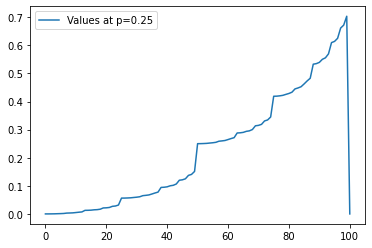

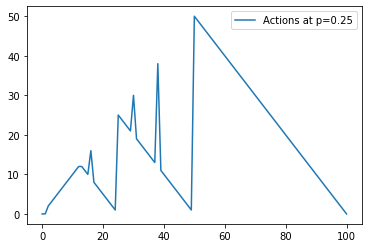

[0.      0.00988 0.01996 0.02832 0.04032 0.04886 0.05721 0.07269 0.08146
 0.08967 0.09871 0.10749 0.11558 0.13877 0.14685 0.15532 0.16456 0.17265
 0.18116 0.19132 0.19941 0.20792 0.21716 0.22525 0.23349 0.27225 0.28033
 0.28858 0.29666 0.30569 0.31333 0.32157 0.33245 0.33992 0.34824 0.35789
 0.36477 0.37199 0.38651 0.39398 0.4023  0.41195 0.41883 0.42605 0.43871
 0.44542 0.45243 0.46    0.46672 0.47374 0.55    0.55808 0.56633 0.57317
 0.58299 0.58998 0.59681 0.60947 0.61665 0.62337 0.63076 0.63795 0.64456
 0.66353 0.67015 0.6769  0.68464 0.69104 0.69773 0.70654 0.71293 0.71963
 0.72768 0.73323 0.73902 0.77275 0.77936 0.78611 0.79171 0.79974 0.80546
 0.81105 0.82141 0.82728 0.83258 0.83874 0.84471 0.8493  0.86564 0.87064
 0.87621 0.88267 0.88719 0.89211 0.90058 0.90487 0.90931 0.91473 0.91827
 0.9219  0.     ]
[ 0.  1.  2.  3.  4.  5.  5.  6.  8.  9. 10. 11. 10. 12. 12. 14. 16. 15.
 17. 19. 18. 20. 22. 21. 20. 25. 24. 23. 24. 22. 28. 23. 19. 20. 21. 22.
 23. 24. 13. 14. 15. 16. 17. 18. 

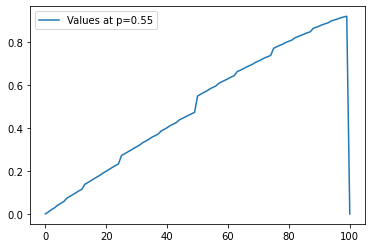

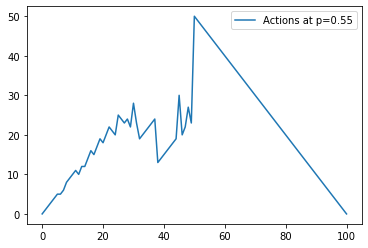

In [212]:
for i in range(3):
    discounted_cost_problem(1e-3,0.9,np.zeros(101),np.zeros(101),np.linspace(0,100,101),np.zeros(101),p_values[i])

# Average Cost Formulation

In [114]:
def reward_avg(next_state):
    if(next_state == 100):
        return 1
    else:
        return 0

In [245]:
# epsilon: Convergence criterion, alpha: discount factor, V: current iteration of optimal values, V_prev: previous iteration
# of optimal values, states: the states from 0 to 100, actions: stores the optimal actions for each state, p: probability of
# winning double your investment

def average_cost_problem(eps,V,V_prev,states,actions,p):
    iters = 0
    
    # np.max(np.abs(V - V_prev)) > eps, using direct iterations for greater accuracy
    # used 1001 iterations for plots in report
    
    while(iters < 1001):
        
        V_prev = np.copy(V)
        
        for state in range(101):
            if(state == 0):
                V[state] = V_prev[1]
                # V[state] = round(V[state],5)
                actions[state] = 1
            elif(state == 100):
                V[state] = V_prev[99]
                actions[state] = 1
                # next_reward = round(next_reward,5)
                
            else:
                
                V[state] = -100
                
                for action in range(min(state,100-state) + 1):
                    next_reward = p*(reward_avg(min(state+action,100)) + V_prev[min(state+action,100)]) + (1-p)*(reward_avg(max(0,state-action)) + V_prev[max(0,state-action)])
                    next_reward = round(next_reward,5)
                    if(next_reward > V[state]):
                        V[state] = next_reward
                        actions[state] = action
        # print(V)
        iters = iters + 1
        
        if(iters%100 == 0):
            plt.plot(states,V/iters,label='Values at p=' + str(p) + ' Iters=' + str(iters))
            plt.legend()
            ax = plt.gca()
            ax.set_ylim(bottom = 0, top = 1)
    
    # plt.savefig('Values_at_p=' + str(p) +'AVG' + 'AXES' +  'iters=' + str(iters) + '.png')
    plt.show()
    
    print(V/iters)
    print(actions)
    
    plt.plot(states,actions,label='Actions at p=' + str(p))
    plt.legend()
    ax = plt.gca()
    # plt.savefig('Actions_at_p=' + str(p) +'AVG' + 'AXES' +  'iters=' + str(iters) + '.png')
    # ax.set_ylim(bottom = 0, top = 100)
    plt.show()

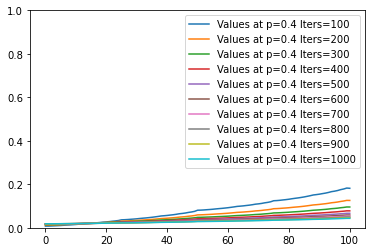

[0.01840248 0.01842264 0.0185033  0.01860901 0.01870493 0.01882142
 0.01896923 0.01909289 0.01920901 0.01934983 0.01950024 0.01967961
 0.01986976 0.02006707 0.0201789  0.02030633 0.02046921 0.02062339
 0.02082126 0.02105373 0.02119729 0.02138751 0.02164572 0.02184599
 0.02212108 0.02254178 0.02261437 0.02273534 0.02289393 0.0230378
 0.02321254 0.02343425 0.02361973 0.02379393 0.02400514 0.02423077
 0.02449983 0.02478504 0.02508102 0.02524875 0.02543992 0.02568424
 0.02591548 0.02621229 0.026561   0.02677634 0.02706168 0.02744899
 0.0277494  0.02816204 0.02880115 0.02886163 0.02898262 0.02914119
 0.02928506 0.0294598  0.02968151 0.02986699 0.03004119 0.03025241
 0.03047803 0.03074709 0.03103231 0.03132828 0.03149601 0.03168717
 0.03193149 0.03216275 0.03245955 0.03280826 0.03302361 0.03330894
 0.03369625 0.03399666 0.03440929 0.03504034 0.03514922 0.03533069
 0.03556856 0.03578437 0.03604647 0.03637904 0.03665726 0.03691855
 0.03723539 0.03757383 0.03797741 0.03840523 0.03884919 0.03910

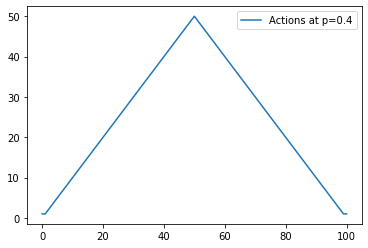

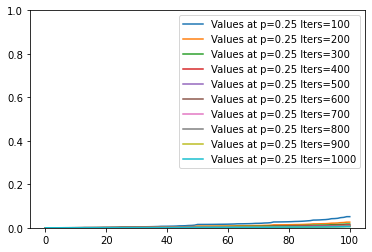

[0.00018713 0.00018733 0.00018867 0.00019116 0.00019407 0.00019779
 0.00020401 0.00021175 0.0002156  0.00022138 0.00023052 0.00024257
 0.0002554  0.00028347 0.00028633 0.00029131 0.00030178 0.000309
 0.0003249  0.00035556 0.00036145 0.00037472 0.00040964 0.00042401
 0.00046097 0.00057191 0.00057321 0.00057724 0.00058471 0.00059341
 0.0006046  0.00062325 0.00064645 0.00065803 0.00067536 0.00070279
 0.00073893 0.00077742 0.00086161 0.00087023 0.00088514 0.00091654
 0.00093823 0.00098589 0.0010779  0.00109556 0.00113537 0.00124013
 0.00128324 0.00139413 0.00172699 0.00172815 0.00173219 0.00173965
 0.00174835 0.00175954 0.00177819 0.0018014  0.00181298 0.00183031
 0.00185773 0.00189388 0.00193238 0.00201655 0.00202517 0.0020401
 0.00207149 0.00209318 0.00214085 0.00223286 0.00225051 0.00229032
 0.00239508 0.00243818 0.00254907 0.0028819  0.00288579 0.0028979
 0.00292029 0.00294638 0.00297995 0.00303592 0.00310552 0.00314026
 0.00319228 0.00327453 0.00338296 0.00349845 0.00375099 0.00377686

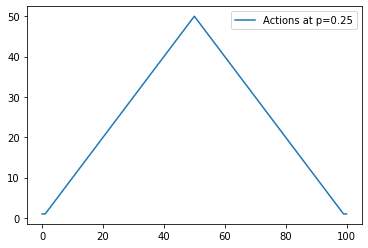

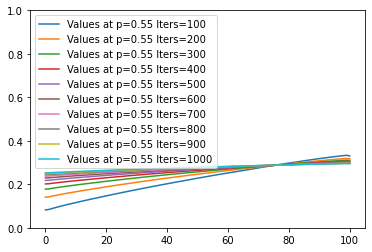

[0.25267749 0.25296529 0.25372408 0.25443133 0.25510367 0.255762
 0.25638957 0.25699962 0.25761202 0.25821548 0.25880899 0.25938837
 0.25995003 0.26050224 0.26105921 0.26162048 0.26217268 0.26272278
 0.26326988 0.26381263 0.26434898 0.26488007 0.2654024  0.26591662
 0.26642362 0.26692613 0.26742762 0.26792632 0.26842236 0.26891541
 0.26940501 0.26989018 0.27037063 0.27084628 0.27131513 0.27178123
 0.27224349 0.27270224 0.27315717 0.27360897 0.27405781 0.27450394
 0.27494694 0.27538605 0.27582076 0.27625106 0.27667614 0.27709958
 0.2775236  0.27794337 0.27836195 0.27877746 0.27918978 0.27959783
 0.28000312 0.28040516 0.28080297 0.28119639 0.28158564 0.28196937
 0.28235076 0.28273925 0.28312659 0.28350843 0.28388982 0.28426952
 0.28464677 0.2850211  0.28539079 0.28575679 0.2861176  0.28647365
 0.28682354 0.28716803 0.28751696 0.28786232 0.288209   0.28856325
 0.28892318 0.28927538 0.28961968 0.28996881 0.29031226 0.2906529
 0.2909877  0.29131477 0.29163243 0.29194448 0.2922559  0.2925772

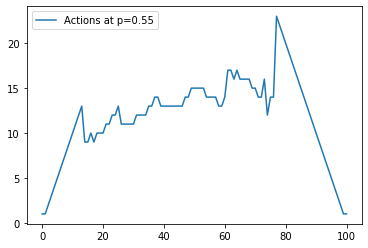

In [246]:
for i in range(3):
    average_cost_problem(1e-3,np.zeros(101),np.zeros(101),np.linspace(0,100,101),np.zeros(101),p_values[i])